# Matplotlib

In this document we are going to explore the **Matplotlib** library which is considered as the standard graphics library in Pyhton. Today there are other options that we cannot see here, as **Seaborn** or **Plotly**, which produce graphics very similar to those of **ggplot2** in R.

## 1.- Usages

There are three main forms of using this module:

  * Using the **pyplot** module, so that the commands and functions to use are similar to those of **Matlab**
  * Using the own **objects** of the library. This is slightly more complex than the previous one but give us the chance to have a more configurable environment
  * Using the **pylab** module, which combines matplotlib and **numpy**. This is probably the less recommended form to code and we will not use it here.

## 2.- Pyplot Module

Let's load the module in the standard form

In [1]:
import matplotlib.pyplot as plt

see that we will always use the **plt** combination as a reference to this module. Let's create a very simple example with just points and lines. 

Let's first define the lists with the values of the coordinates

In [2]:
X = [1, 2, 3, 4, 5]
Y = [10, 30, 20, 60, 30]

now we can make the easiest plot

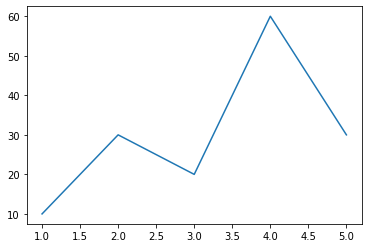

In [3]:
plt.plot(X, Y)
plt.show()

the relevant point here is that the **plot** function just creates the plot but does not visualize it and that is why we need the **show** function (see that in markdown there is an implicit call for *show*).

To add titles and axis names we can use the following functions

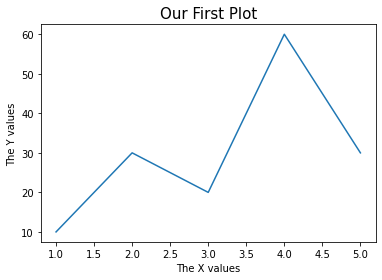

In [4]:
plt.title("Our First Plot", fontsize = 15)
plt.xlabel("The X values")
plt.ylabel("The Y values")
plt.plot(X, Y)
plt.show()

Then we see that the general logic scheme is that we go adding as many layers as objects we want in our graphs.

What if we have more than one set of Y-values? The plot function gives us some freedom with the inputs and we can put all of them in the same function call. One possibility is

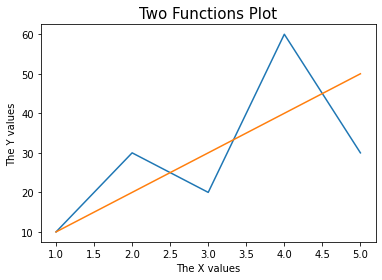

In [5]:
Y2 = [10, 20, 30, 40, 50]

plt.title("Two Functions Plot", fontsize = 15)
plt.xlabel("The X values")
plt.ylabel("The Y values")
plt.plot(X, Y, X, Y2)
plt.show()

However, it is typically much better if make different calls for each different graph since we can configure each of them separately (use **plt.plot?** to see all the options in the plot function)

Note that this behaviour is due to the fact that the option **plt.hold** is set to default value of True. This is now a deprecated function and this will always be the default behaviour in matplotlib, but sometimes we may want to clear the plot before placing each new graph.

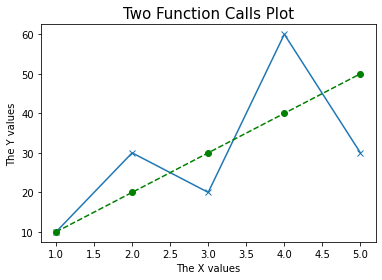

In [6]:
plt.title("Two Function Calls Plot", fontsize = 15)
plt.xlabel("The X values")
plt.ylabel("The Y values")
plt.plot(X, Y, marker = "x")
plt.plot(X, Y2, color = "green", marker = "o", ls = "dashed")
plt.show()

### 2.1.- Subgraphs

In many cases we may want to display the information in different plots in the same chart. This is done using **subplots**. With the pyplot module we can use the **subplot2grid** function. 

The idea is that once we create a grid and assing to one of its cells a graph, we act on each of them separatedly as in our previous examples. Let's see how to do this with our previous values

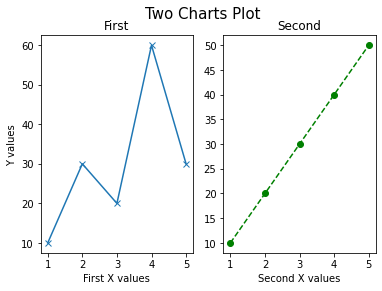

In [7]:
plt.suptitle("Two Charts Plot", fontsize = 15)

plt.subplot2grid((1,2), (0,0), colspan = 1, rowspan = 1)
plt.title("First")
plt.ylabel("Y values")
plt.xlabel("First X values")
plt.plot(X, Y, marker = "x")

plt.subplot2grid((1,2), (0,1), colspan = 1, rowspan = 1)
plt.title("Second")
plt.xlabel("Second X values")
plt.plot(X, Y2, color = "green", marker = "o", ls = "dashed")

plt.show()

Note that we the only other new instruction is the **suptitle** we have added on top of the code. Let's understand the arguments in the **subplot2grid** function:

  * the first pair **(1,2)** represents the number of rows and columns of the subplot. There is no need for these pairs to be the same in the different calls (try different values)
  * the second pair **(0,0)** represents the location (remember the 0-index in Python) in the grid of the corresponding plot
  * the other options represent the number of columns and rows that the plot is going to fill inside the grid (these let you play with different sizes in the same way you could with the number of rows and columns
  
Now, we see that the Y-axis is not the same in both graphs, can we do it? In short, yes. The idea is using the **ylim** and **xlim** functions

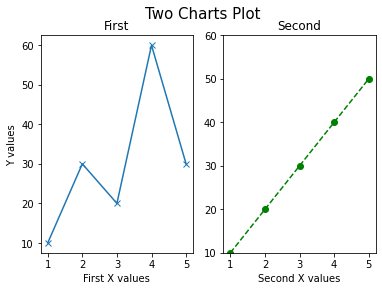

In [8]:
plt.suptitle("Two Charts Plot", fontsize = 15)

plt.subplot2grid((1,2), (0,0), colspan = 1, rowspan = 1)
plt.title("First")
plt.ylabel("Y values")
plt.xlabel("First X values")
plt.plot(X, Y, marker = "x")

plt.subplot2grid((1,2), (0,1), colspan = 1, rowspan = 1)
plt.ylim(10,60)
plt.title("Second")
plt.xlabel("Second X values")
plt.plot(X, Y2, color = "green", marker = "o", ls = "dashed")

plt.show()

### 2.2.- Adding texts

Many times we may want to add some annotations to the graphs. These may come in dfferent forms, but the most common are:

 * **Legends** giving information of each graph in a shared plot
 * **Annotations** giving the equation a graph satisfies (as could be the result of a linear regression) or any other object
 
In order to see relevant graphs, let's create a new set of values from equations and with numpy arrays. We first need to load numpy, then

In [9]:
import numpy as np

Now we generate the array that we will use as our X-values: an array of values from 0.0 to 5.0 with jumps of 0.01

In [10]:
X = np.arange(0.0, 5.0, 0.01)

Now we are going to use **for-loops** to generate the Y-values of four different functions

In [11]:
Y1 = [x**2 for x in X]
Y2 = [x**3 - 2*x**2 for x in X]
Y3 = [8*x for x in X]
Y4 = [2*x**2 + x for x in X]

we are going to plot the two parabloes together and the linear and cubic together using two graphs using the different options we already know

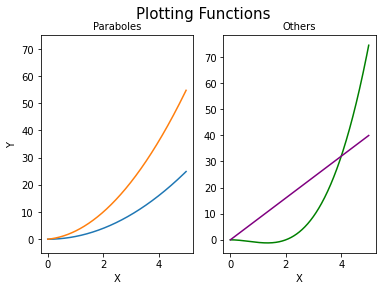

In [12]:
plt.suptitle("Plotting Functions", fontsize = 15)

plt.subplot2grid((1,2), (0,0), colspan = 1, rowspan = 1)
plt.ylim(-5,75)
plt.title("Paraboles", fontsize = 10)
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X,Y1)
plt.plot(X,Y4)

plt.subplot2grid((1,2), (0,1), colspan = 1, rowspan = 1)
plt.title("Others", fontsize = 10)
plt.xlabel("X")
plt.plot(X,Y2, color = "green")
plt.plot(X,Y3, color = "purple")

plt.show()

Nothing is new up to this point. Now, what if we want to add the equations of the paraboles? We have to use the **text** function (another option is ussing the **annotate** function, take a look at it! We will use it later) and what if we want to add a legend only to the second graph? We must use the **legend** function (the argument *loc = "best"* usually saves a lot of time with its location)

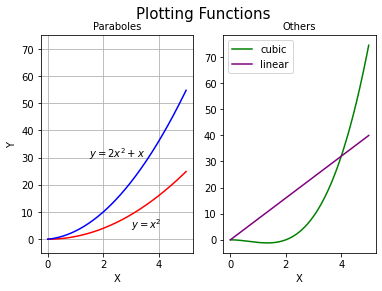

In [13]:
plt.suptitle("Plotting Functions", fontsize = 15)

plt.subplot2grid((1,2), (0,0), colspan = 1, rowspan = 1)
plt.ylim(-5,75)
plt.title("Paraboles", fontsize = 10)
plt.ylabel("Y")
plt.xlabel("X")
plt.plot(X, Y1, color = "red")
plt.text(3, 4, r'$y = x^2$')
plt.plot(X, Y4, color = "blue")
plt.grid()
plt.text(1.5, 30, r'$y = 2x^2+x$')

plt.subplot2grid((1,2), (0,1), colspan = 1, rowspan = 1)
plt.title("Others", fontsize = 10)
plt.xlabel("X")
plt.plot(X, Y2, color = "green", label = "cubic")
plt.plot(X, Y3, color = "purple", label = "linear")
plt.legend(loc = "best")

plt.show()

Note that we have added a grid to the first graph for completeness.

The peculiar point here is the notation **r'\\$ \\$'** in the text of the equation: this is the way of telling matplotlib to turn the text string into a **raw string** which is then interpreted as a LaTeX in-line equation so that we can write anything in the graphs in very much the same way as we write equations in these notebooks.

### 2.3.- Specific Graphs

Up to this point we have seen how to add different structure layers to our matplolib graph. However, in statistics we are generally more interested in particular types of graphs in order to perform our Exploratory Data Analysis (EDA). We will now see how to deal with

  * Histograms
  * Boxplots
  * Bar-plots
  
Since these graphs require a **more statistical** data set, let's create a **pandas** data frame with some random values. First we need to import pandas into our worksheet

In [14]:
import pandas as pd
import random as rd

The following funciton is out of the scope of the course. We define it on our own just for the sake of the example in order to generate a random vector of a categorical variable

In [15]:
def rand_gl(x, m, name = None, labels = None):
    '''
    Creation of a randomly generated factor series of pandas
    
    INPUT:
    x: value that determines the number of possible categories, since we begin at 0, a velue of 1 will imply 2 categories
    m: length of the vector
    name: default values of the input values: 0, 1,... The number of names cannot be in disagreement with the value of x
    labels: labels of the categories. The number of labels cannot be in disagreement with the value of x
    
    OUTPUT:
    the output is a categorical vector of length m with labels given by the names or the labels with 
    '''
    cat = []
    for i in range(m):
        cat += [rd.randint(0, x)]
    
    if name is None:
        cat = pd.Series(cat, dtype = 'category', name = 'categories')
    else:
        cat = pd.Series(cat, dtype = 'category', name = name)
    
    if labels is None:
        return(cat)
    else:
        cat = cat.cat.rename_categories(labels)
        return(cat)

Now we can define our data frame as

In [16]:
mydata = pd.DataFrame({'gender': rand_gl(1, 500, labels = ['female', 'male']),
                       'normal': np.random.normal(0, 1, 500),
                       'binomial': np.random.binomial(150, 0.2, 500)})

we can see its top values using the **head** method

In [17]:
mydata.head()

,gender,normal,binomial
0,female,-0.032814,31
1,male,-0.367732,26
2,male,0.540176,34
3,female,-0.965841,32
4,female,0.535692,32


#### 2.3.1.- Graph Theme

Before going on, we should mention that there is a function that let us define a general styling of our graphs, the **style** function, which comes with some predefined options. In this case we are going to use the **seaborn** style (the help page in this case is not really helpful so you should take a look at the matplotlib page)

In [18]:
plt.style.use("seaborn")

you can take a look at the different available schemes using

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Try different styles until you find one that fits you... Or define your own one! 

#### 2.3.2.- Histograms

Let's first plot the histogram of a variable. There are some key ideas we may need to remember

  * A histogram can only be done for a continuous nnumerical variable, any other graph will be a usual bar plot.
  * In a histogram, the number of classes (turned into the number of bins) is absolutely arbitrary, although there are some main formulas to find an optimum number of them: Rice's rule or Sturges' rule are some examples. In view of this, it is important to keep in mind that there is no definite form for the histogram, although some elections will make it easier to see some properties than others.
  * The type of data we represent is usually known as grouped data, since we are creating a sort of equivalence groups in which we say that all the values in the class are assimilated to the class mark, the central value of the class.
  * Once we group our data, we cannot use the exact values of the mean, median or mode, and then we have to use the approximated values, which are computed using the class marks and the boundary values of the classes.

Now, in matplotlib the most basic form for the histogram is using the **hist** function which can be called using just the dataset as argument

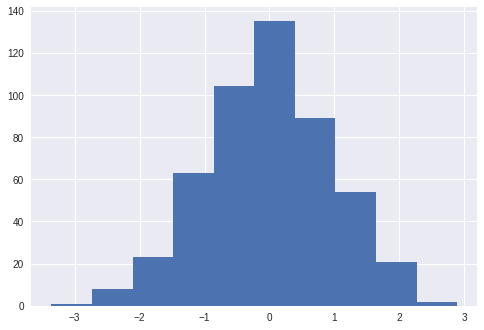

In [20]:
plt.hist(mydata.normal)

plt.show()

this function can be given many different arguments in order to obtain a nicer plot. Consider the following code and try to make sense of the options we have used

In [21]:
from scipy.stats import norm

the previous line let us have the normal distribution functions from **scipy.stats** available for our graphs

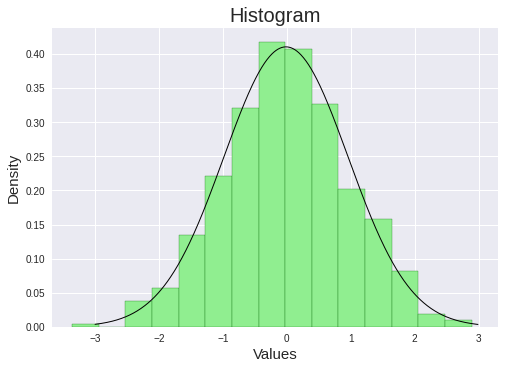

In [22]:
plt.plot(np.arange(-3, 3, 0.01),
         norm.pdf(np.arange(-3, 3, 0.01),
                  mydata.normal.mean(),
                  mydata.normal.std()),
         color = "Black",
         lw = 1)

plt.hist(mydata.normal,
         bins = 15,
         density = True,
         ec = "darkgreen",
         color = "lightgreen"
        )

plt.title("Histogram", fontsize = 20)
plt.ylabel("Density", fontsize = 15)
plt.xlabel("Values", fontsize = 15)

plt.show()

Apart from the arguments used in the histogram function, we have added a second plot on top of it corresponding to the probability distribution function of a normal distribution with the mean and standard deviation of our dataset. This is very useful when we want to have a visual inspection of the normality of a data set without further formal tests.

We can make this plot in a cleaner way if we use the **single underscore** of Python. We leave to the interested reader to take a look at the uses of this key command

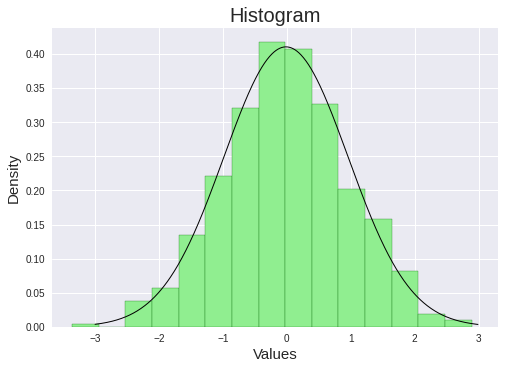

In [23]:
x_range = np.arange(-3, 3, 0.01)
mean = mydata.normal.mean()
stdev = mydata.normal.std()

_ = plt.hist(mydata.normal, bins = 15, ec = "darkgreen", density = True, color = "lightgreen")
_ = plt.xlabel("Values", fontsize = 15)
_ = plt.ylabel("Density", fontsize = 15)
_ = plt.title("Histogram", fontsize = 20)
_ = plt.plot(x_range, norm(mean, stdev).pdf(x_range), color = 'black', lw = 1)

plt.show()

see that we have used some short forms of some of the arguments: **lw** instead of **linewidth** or **ec** instead of **edgecolor**, take a look at the documentation in order to see when you can use these and others.

In our dataset we have a categorical variable that contains two different categories: male and female. Usually we are going to be intereseted in comparing different populations based on such a categorical structure. In this case we can follow two different approaches: plot one histogram by the other, plot both histograms in a side-by-side way. Since the first case does not add anything to our previous codes (try to do it anyway!) we are going to make the second one.

To make it we first need to filter the dataset and then make the plot

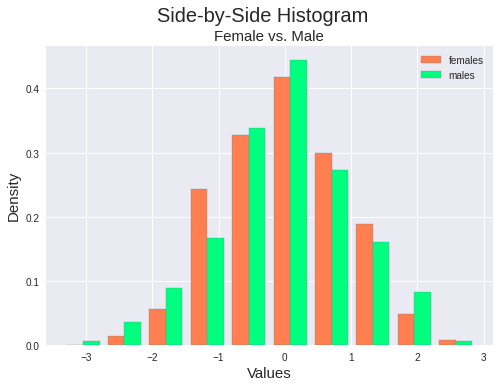

In [24]:
plt.hist([mydata[mydata.gender == "female"].normal, 
          mydata[mydata.gender == "male"].normal],
         label = ["females", "males"],
         color = ["coral", "springgreen"],
         ec = "slategray",
         density = True)
plt.legend(loc = "best")
plt.suptitle("Side-by-Side Histogram", fontsize = 20)
plt.title("Female vs. Male", fontsize = 15)
plt.xlabel("Values", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

plt.show()

Repeat the code before making the definition of the different datasets *out* of the histogram call

#### 2.3.3.- Boxplots

This second type of plot let us see some information not directly accesible from the histogram: the **median**, the different **quartiles**, the **IQR** and the **whiskers** to determine the outliers of the distribution. The basic instruction in matplotlib is **boxplot**, then

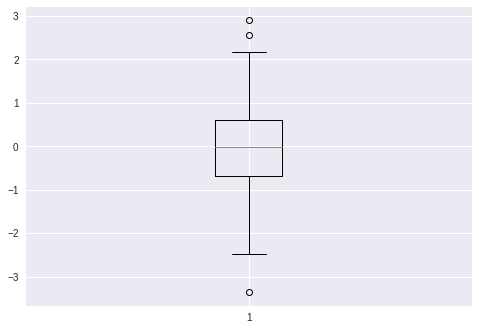

In [25]:
plt.boxplot(mydata.normal)

plt.show()

Let's add some structure to this plot by means of the arguments of the function

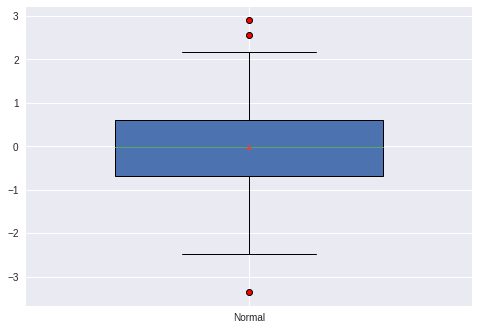

In [26]:
plt.boxplot(mydata.normal,
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'),
            labels = ["Normal"])

plt.show()

The options we have used are 

  * First we call for the data set to be plotted, in this case, the normal distribution variable in *mydata*
  * The **patch_artist** is a graphical option to fill the box with color
  * The **showmeans** is the logical argument to show the mean (remember that this is usually not available in the boxplots, where we can only find the median)
  * The **widths** argument is the width of the box inside the printing region
  * With the **flierpros** we create a **dictionary** of different options for the outlers, in particular, we give a circular shape and a filling red color
  * The **whis** argument gives a value where we will see the whiskers of the plot. Remember that the whiskers are usually determined as the boundary of the Tukey's limits, in particular, we consider that an observation is an **outlier** if it lies outside of the interval $[Q_1 - 1.5\,IQR,\; Q_3 + 1.5\,IQR]$, but we may also want to detect **extreme outliers**, and then the limit is found multiplying times 3. The argument takes 1.5 as default and we have used it just to show it.

as usually we recommend you to take a look at the documentation of the function and try other options.

As we did before with the histogram, let's plot the two different categories of females and males. The idea is giving to the boxplot function a list as argument

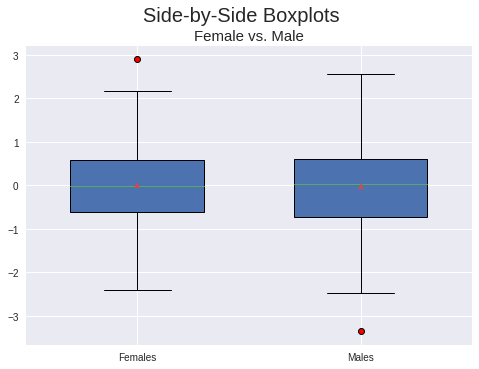

In [27]:
plt.boxplot([mydata[mydata.gender == "female"].normal, 
             mydata[mydata.gender == "male"].normal],
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'),
            labels = ["Females", "Males"])

plt.suptitle("Side-by-Side Boxplots", fontsize = 20)
plt.title("Female vs. Male", fontsize = 15)

plt.show()

Note that instead of the **labels** argument we can use the **xticks** function of pyplot (which gives further freedom when we want to use customized labels in the axis)

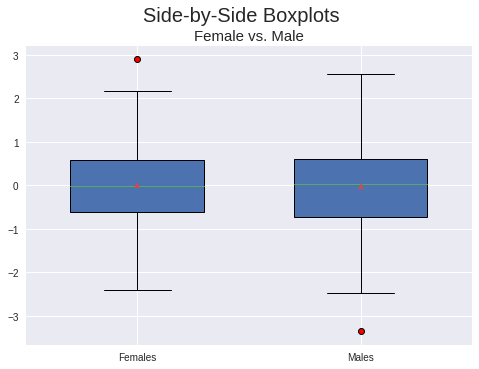

In [28]:
plt.boxplot([mydata[mydata.gender == "female"].normal, 
             mydata[mydata.gender == "male"].normal],
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))
plt.xticks([1, 2], ["Females", "Males"])
plt.suptitle("Side-by-Side Boxplots", fontsize = 20)
plt.title("Female vs. Male", fontsize = 15)

plt.show()

We mentioned the uses of the **text** function, however we can also use the **annotate** function to write custom strings inside the graphs. Suppose that we want to annotate the outliers of the distribution of males

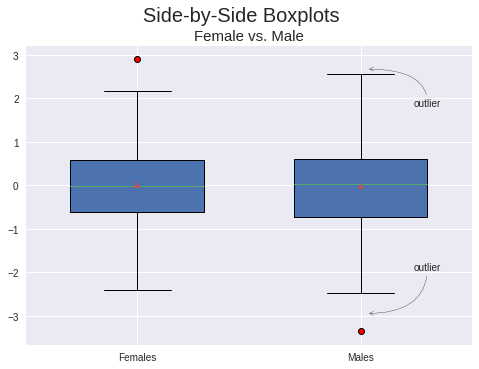

In [29]:
plt.boxplot([mydata[mydata.gender == "female"].normal, 
             mydata[mydata.gender == "male"].normal],
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))
plt.xticks([1, 2], ["Females", "Males"])
plt.suptitle("Side-by-Side Boxplots", fontsize = 20)
plt.title("Female vs. Male", fontsize = 15)

plt.annotate("outlier", xytext = (2.3, 2), xy = (2.03, 2.67), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate("outlier", xytext = (2.3, -2), xy = (2.03, -2.95), 
             ha = "center", 
             va = "bottom",
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))

plt.show()

in this function we have

  * The **xytext** determines the location of the annotated text and the origin of the arrow
  * The **xy** determines the location of the ending of the arrow
  * The **ha** and **va** arguments determine the vertical and horizontal alignments
  * The **arrowprops** determines the the properties of the arrows
  
Let's finally make a plot with a histogram and boxplot together. We are going to make a plot satisfying the following conditions:

  * We are going to filter by males
  * Histogram and boxplot one by the other
  * Annotate the relevant measures in the distribution (in the boxplot only)

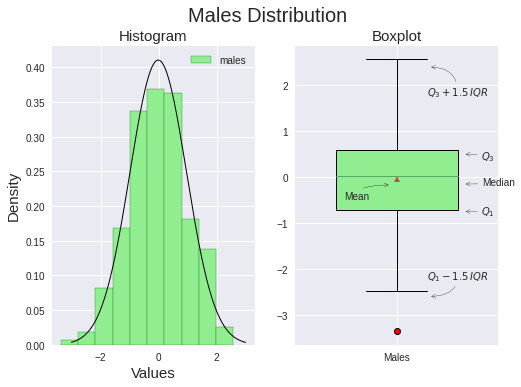

In [30]:
plt.suptitle("Males Distribution", fontsize = 20)

plt.subplot2grid((1,2), (0,0), colspan = 1, rowspan = 1)
plt.hist(mydata[mydata.gender == "male"].normal,
         label = "males",
         color = "lightgreen",
         ec = "darkgreen",
         density = True)
plt.legend(loc = "best")

plt.plot(np.arange(-3, 3, 0.01),
         norm.pdf(np.arange(-3, 3, 0.01),
                  mydata.normal.mean(),
                  mydata.normal.std()),
         color = "Black",
         lw = 1)

plt.title("Histogram", fontsize = 15)
plt.xlabel("Values", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

plt.subplot2grid((1,2), (0,1), colspan = 1, rowspan = 1)

plt.boxplot(mydata[mydata.gender == "male"].normal,
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            labels = ["Males"],
            boxprops = dict(facecolor = "lightgreen"),
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))
plt.title("Boxplot", fontsize = 15)

plt.annotate("Mean", xytext = (0.8, -0.3), xy = (0.97, -0.17), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate("Median", xytext = (1.5, 0), xy = (1.33, -0.15), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate(r'$Q_1$', xytext = (1.45, -0.6), xy = (1.33, -0.75), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate(r'$Q_3$', xytext = (1.45, 0.6), xy = (1.33, 0.5), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate(r'$Q_1-1.5\,IQR$', xytext = (1.3, -2), xy = (1.16, -2.6),
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))
plt.annotate(r'$Q_3+1.5\,IQR$', xytext = (1.3, 2), xy = (1.16, 2.4),
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))

plt.show()

#### 2.3.4.- Bar Plots

Let's see the last type of chart we are going to use: the bar plots. This type of plots let us make a graphical representation of the frequencies of categorical variables. This implies that prior to the graph we must find these frequencies!

Thankfully, this can be easily done in pandas using the **size** and **groupby** functions

In [31]:
gender_dist = mydata.groupby(["gender"]).size()
gender_dist

gender
female    230
male      270
dtype: int64

now the barplot can be done using the **bar** or **barh** functions: the first makes the usual vertical bars while the second makes horizontal bars (this can also be achieved with the **orientation** argument)

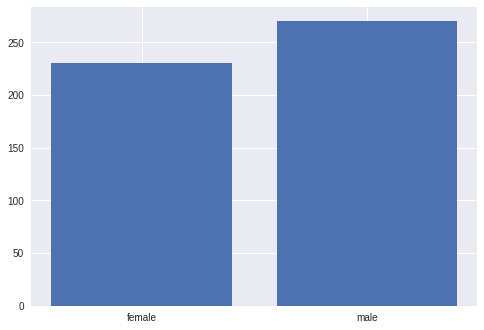

In [32]:
plt.bar(gender_dist.index, gender_dist)
plt.show()

Sometimes we will have more than just one categoy, for example, males and females with respect to their activity levels and we may want to make **grouped bar** plots. To see this let's add to our dataset another column with this new categorical column

In [33]:
mydata["activity"] = rand_gl(2, 500, labels = ['low', 'mid', 'high'])

Now we can group with respect to both variables and then count the corresponding frequencies

In [34]:
g_acti = mydata.groupby(["gender", "activity"]).size()

see that if we invert the order in the groupby function we make the groups the other way around. The problem is that the object we find in this operation is not arranged in the way we need and we should hask it a bit before making the plot: the final object should have two columns: one for males another for females while the index is still de activity level.

In [35]:
males = pd.DataFrame(g_acti.iloc[3:6].values, columns = ["males"], index = ["low", "mid", "high"])
females = pd.DataFrame(g_acti.iloc[0:3].values, columns = ["females"], index = ["low", "mid", "high"])
gender_acti = pd.concat([females, males], axis = 1)
gender_acti

,females,males
low,87,99
mid,63,85
high,80,86


Now we can make the plot. However take into account that in this case the best way of making the plot is using the methods of pandas directly, since the precedure we are going to use is rather lenghty and not too interesting (once we have the others), the idea is: since we have categories and not numbers in the x-axis we assign numbers and by the end we go back to the names, let's see it

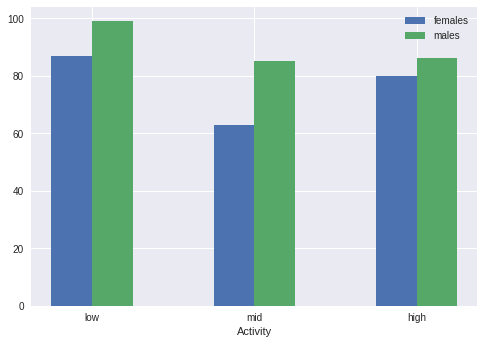

In [36]:
barWidth = 0.25

r_fem = np.arange(len(gender_acti.females))
r_mal = [x + barWidth for x in r_fem]

plt.bar(r_fem, gender_acti.females, barWidth, label = "females")
plt.bar(r_mal, gender_acti.males, barWidth, label = "males")

plt.xlabel('Activity')
plt.xticks([x + barWidth/2 for x in r_fem], ["low", "mid", "high"])

plt.legend(loc = "best")
plt.show()

#### 2.3.5.- Scatter Plots

These are the most common plots for bidimensional distributions of data, i.e. in any case we have two different variables and we want to study them from the points of view of association, correlation and relationship. 

In matplotlib we also have a basic function for this plot: `scatter()`, then we can do

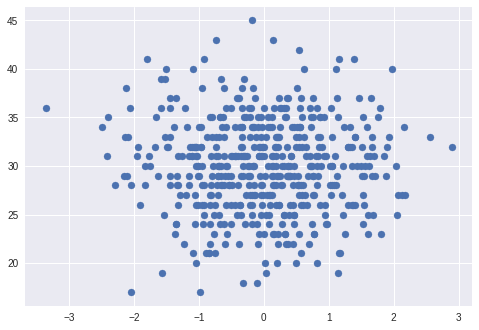

In [37]:
plt.scatter(x = 'normal', y = 'binomial', data = mydata)
plt.show()

we can also plot choosing the colors with respect to one of the variables, but that requires the definition of a color map which can be done in the function call but is clearer if we do it outside

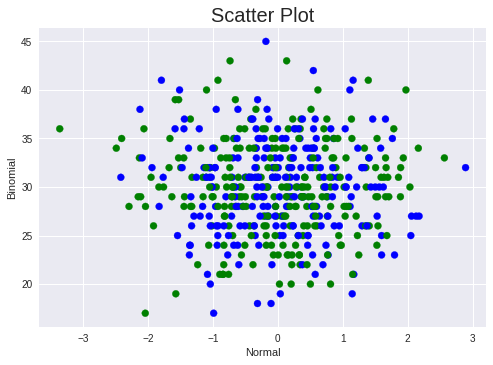

In [38]:
colors = {'female':'blue', 'male':'green'}

plt.scatter(mydata.normal, mydata.binomial, c = mydata.gender.map(colors))
plt.xlabel("Normal")
plt.ylabel("Binomial")
plt.title("Scatter Plot", fontsize = 20)

plt.show()

we can complete this plot adding extra structures as before by, for example drawing the histograms of each of the variables in the corresponding axis

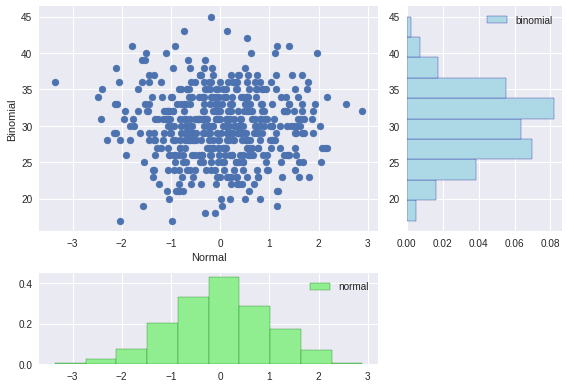

In [39]:
plt.subplot2grid((3,3),(0,0),rowspan = 2, colspan = 2)
plt.scatter(mydata.normal, mydata.binomial)
plt.xlabel("Normal")
plt.ylabel("Binomial")

plt.subplot2grid((3,3),(2,0),rowspan = 1, colspan = 2)
plt.hist(mydata.normal,
         label = "normal",
         color = "lightgreen",
         ec = "darkgreen",
         density = True)
plt.legend(loc = "best")

plt.subplot2grid((3,3),(0,2),rowspan = 2, colspan = 1)
plt.hist(mydata.binomial, 
         orientation = "horizontal",
         label = "binomial",
         color = "lightblue",
         ec = "darkblue",
         density = True)
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

you can now add any layer that you consider interesting to the plot

## 3.- The Python Way

Once we have seen how to make the graphs using the pyplot module, let's take a brief look at the python way, i.e. by accessing the objects of the matplolib package. In this case it is convenient to identify the three main objects of any plot

  * The **FigureCanvas**, or the container class of the Figure
  * The **Figure**, or the container class of the Axes
  * The **Axes**, or the rectangular areas that contain the graphical elements
  
Note that in this hierarchy we will always add plots in the Axes class however, we must always create a new instance of the plot by calling to the figure, i.e. these always begin as

In [40]:
plt.figure()

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

Now we have to generate the axes in which our plots will live. After that, we can use all our previous commands in order to generate the plots we need

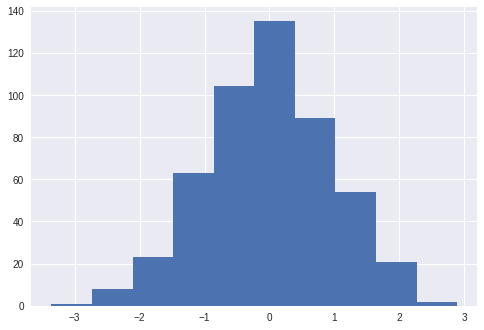

In [41]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(mydata.normal)

plt.show()

The only peculiar in this call are the set of number in the subplot argument. These determine the location of the plot in the axis. They mean (in order) 

  * the number of rows
  * the number of columns
  * the index of the plot

then if we write plt.subplot(221) means a subplot with four axes: two rows and two columns and we place the graph in the first one. Then we can use this to place different graphs in different axes.

The number of rows and columns can change in different subplots. The only relevant thing to consider is that the index cannot be larger than the number of possible axes and that we do not overlap the graphs

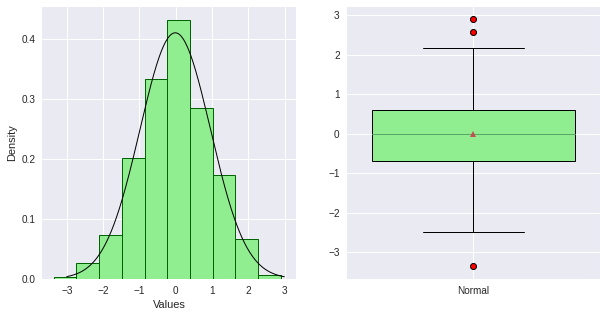

In [42]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
_ = ax1.hist(mydata.normal, bins = 10, ec = "darkgreen", color = "lightgreen", lw = 1, density = True)
_ = plt.xlabel("Values")
_ = plt.ylabel("Density")
_ = ax1.plot(x_range, norm(mean, stdev).pdf(x_range), color = 'black', lw = 1)

ax2 = plt.subplot(122)
ax2.boxplot(mydata.normal,
            patch_artist = True,
            showmeans = True,
            widths = 0.8,
            labels = ["Normal"],
            boxprops = dict(facecolor = "lightgreen"), 
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))

plt.show()

Note that for this graphs we have used previously defined objects as the *x_range*, the *mean* and the *stdev* in the normal distribution call (also, we can use it because we have already imported for the scipy.stats normal module). Try other combinations of the subplots to place the graphs differently.

As another further question, note that in this second example we have used the **subplot** function instead of the **add_subplot**, can you tell the difference between both approaches?

In this case we can also use the subplots to define the color hue of a scatterplot this may require more advanced programming skills, let's write one possible code for this using a `for` loop

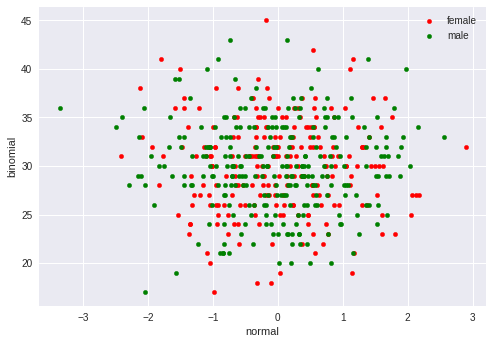

In [43]:
fig, ax = plt.subplots()

colors = {'female':'red', 'male':'green'}

grouped = mydata.groupby('gender')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='normal', y='binomial', label=key, color=colors[key])

plt.show()